# **Project**
▶Mobile Price Range (Classification) Capstone Project

▶Contribution-Individual

Name-Mohd Firoz Chaudhri

# ***Problem Statement***
: Mobile phones have become great necessity for almost all individuals now a days.People want more features and best specification in phone and that too at cheaper cost.The demand of the phone is so high that there is a huge comptetition prevalling between mobile manufactures.To stay ahead in race companies try to bring in new features and innovation.

: Price of mobile phones is influenced by different factor,that is brand name,new model,internal memory,ram,camera,processor etc.As a business point of view,it become an utmost priority to analyse the factor from time to time and come up with best set of specification and price ranges so that people buy their mobile phones.

: Hence ,through this exercise and our predication we will try to help companies estimate price range competition to other manufacturer and also it will be usefull for costumers to verify the price of mobile.


# **DATA SUMMARY**
: Data has these features;

: int memory means internal memory in gegabites.

: M_dep means mobile depth in cm.

: Mobile weight of mobile phones

: Battery power in mah.

: Primry camera in megapixels,number of cores in processor.

: Talk time longest that a single battery charge will last when you are on a call.Px_height,Px_width, access memory in megabites.Blue,3g,4g, dual sim touchscreen,wifi some supported and un supported categories.

# **Github Link**

https://github.com/fkofkf431/Mobile-Price-Range-Classification-Capstone-Project.git

# **Methodology**

We will proceed with reading the data, and then perform data analysis.After data analysis, we will find out the data distribution and data types. We will train 2 or more classification algorithms to predict the output. We will also compare the outputs. Let us get started with the project implementation.

In [1]:
#Importing libraries that are required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import missingno as msno


In [2]:
#Load Dataset
df=pd.read_csv('/content/drive/MyDrive/data_mobile_price_range.csv')

In [3]:
print(df)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

In [4]:
#Check shape of the data
df.shape

(2000, 21)

# *Understanding Data*

In [5]:
#Check first five rows of the dataset
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
#Check last five rows of the dataset
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [7]:
#Check randomly 10 rows of the dataset
df.sample(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
923,1027,1,2.2,0,0,0,63,0.8,102,5,...,152,714,1732,8,5,13,0,1,1,1
28,1453,0,1.6,1,12,1,52,0.3,96,2,...,187,1311,2373,10,1,10,1,1,1,2
1397,717,0,1.1,1,2,1,14,0.1,99,8,...,1878,1981,629,16,15,20,1,0,0,0
680,658,1,2.7,0,0,1,12,0.9,103,7,...,1156,1750,3587,14,11,20,1,0,0,3
586,704,1,2.7,0,8,1,29,0.2,80,1,...,1108,1509,1122,9,3,10,1,1,1,0
381,1482,0,0.5,0,2,0,48,0.2,142,7,...,634,642,2971,12,8,12,1,1,1,2
398,1323,1,2.5,1,10,1,28,0.2,131,4,...,162,619,1892,10,0,15,1,1,1,1
421,1178,0,2.2,1,6,0,57,0.3,84,3,...,96,1352,2492,16,14,10,1,1,0,2
986,1713,0,3.0,1,5,1,20,0.9,104,7,...,237,890,971,11,10,10,1,0,0,0
1406,1731,1,2.3,1,18,0,60,0.5,171,4,...,142,1039,1220,9,3,20,0,1,0,1


In [8]:
#Check information of the dataset to know null values and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In our data we found that we have 2000 Rows and 21 Columns,and also we have zero null values.Now let us do some operations and Statistical implementation to know more about the data.

<Axes: >

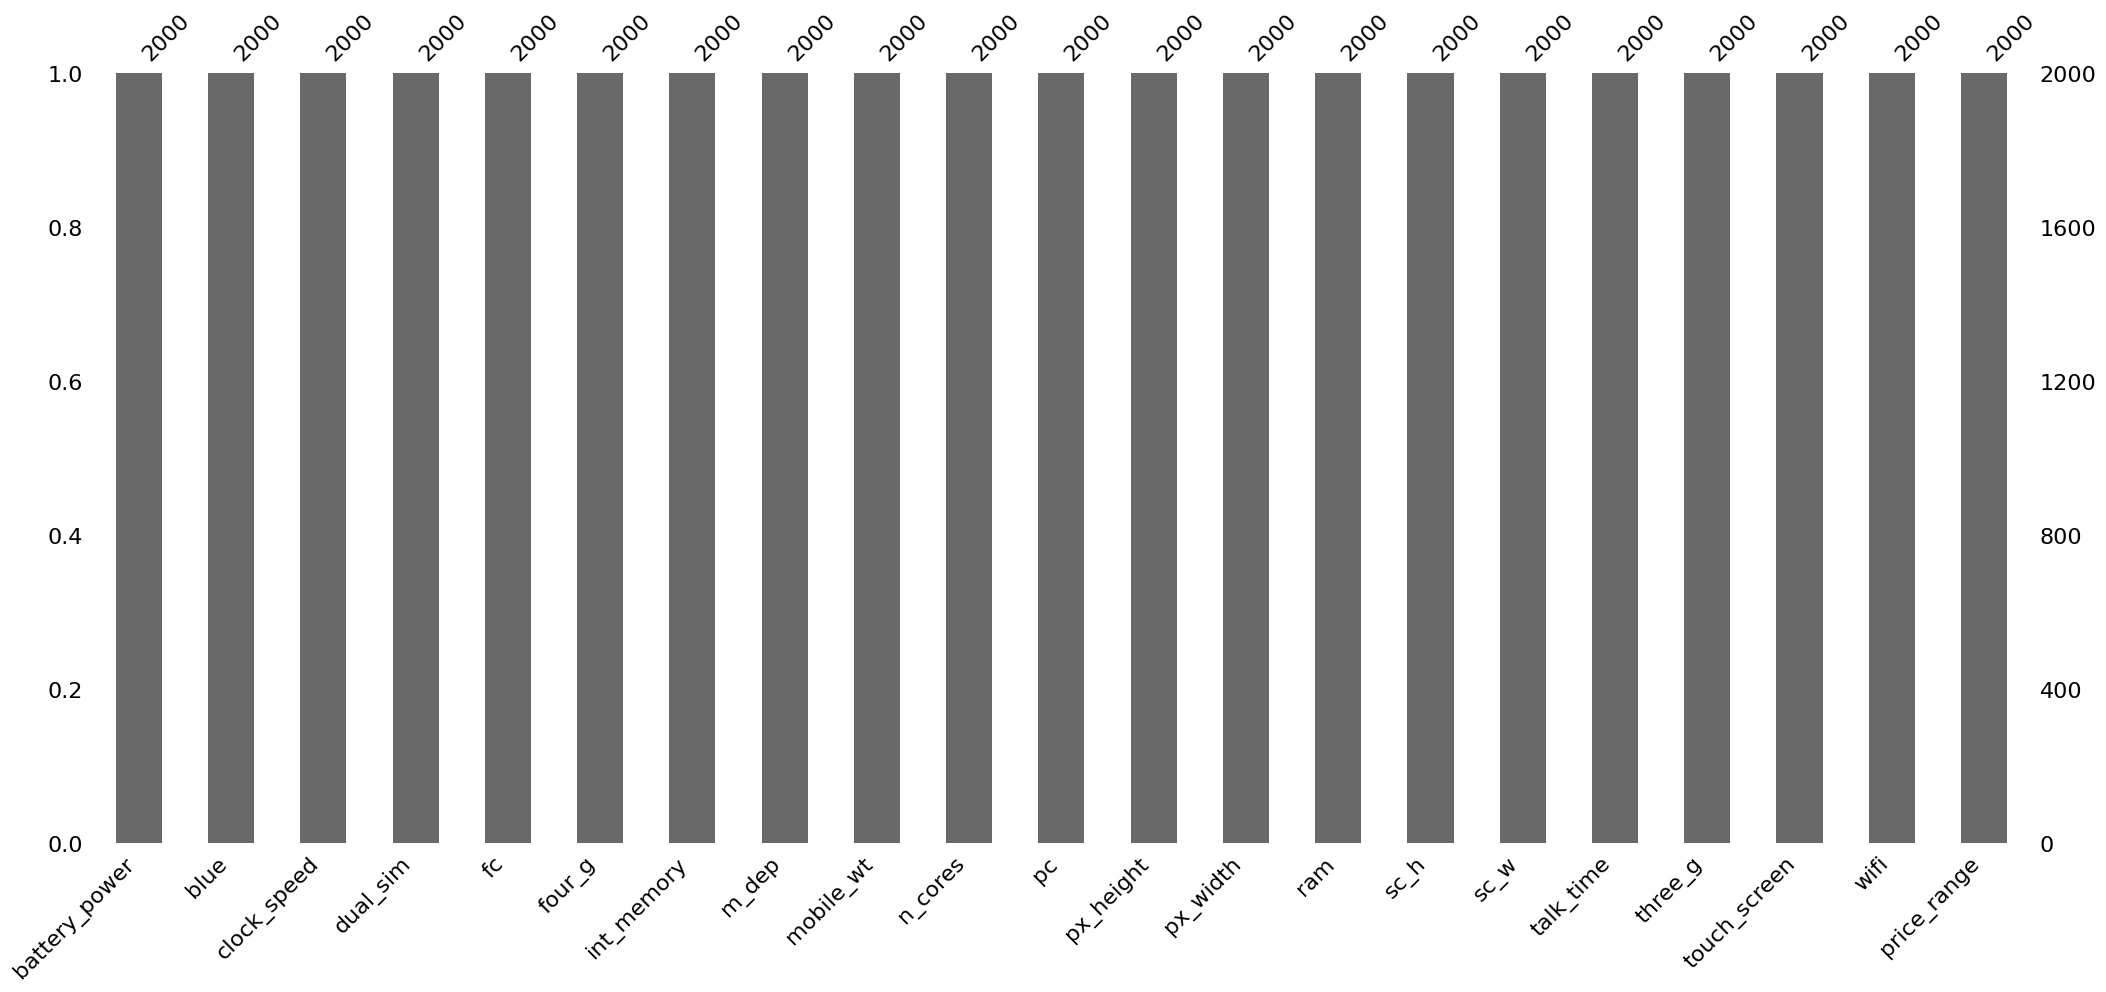

In [9]:
msno.bar(df)

# **EDA(Exploratory Data Analysis)**

In [10]:
#Know some statistical information of the dataset
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [11]:
#Check if there any missing value
df.isnull().count()

battery_power    2000
blue             2000
clock_speed      2000
dual_sim         2000
fc               2000
four_g           2000
int_memory       2000
m_dep            2000
mobile_wt        2000
n_cores          2000
pc               2000
px_height        2000
px_width         2000
ram              2000
sc_h             2000
sc_w             2000
talk_time        2000
three_g          2000
touch_screen     2000
wifi             2000
price_range      2000
dtype: int64

In [12]:
#Now we remove the data points with missing data
df_new=df[df['sc_w']!=0]
df_new

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [13]:
df_new.shape

(1820, 21)

After removing the data points with missing data,we get 1820 rows and 21 columns. Now we will work on this new data.

Let us do  some Univariate,Bivariate and Multivariate analysis and fnd insights about the data using graph.

**Let us visualize the number of elements in each class of the mobile phones**

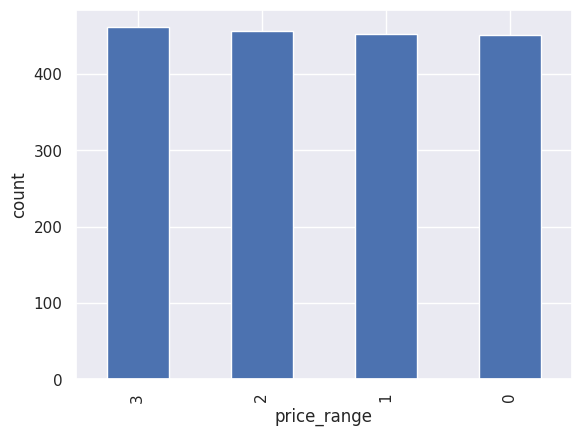

In [14]:
#Make a bar plot of the price_range to know the range of the price of mobile phones
sns.set()
price_plot=df_new['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('count')
plt.show()

Above bar plot shows that we have four price ranges in mobile phone and the mobile price range is almost similar in all the mobile phones.

# **Data Distribution**

▶Let us analyse that how the data is distributed in different column.

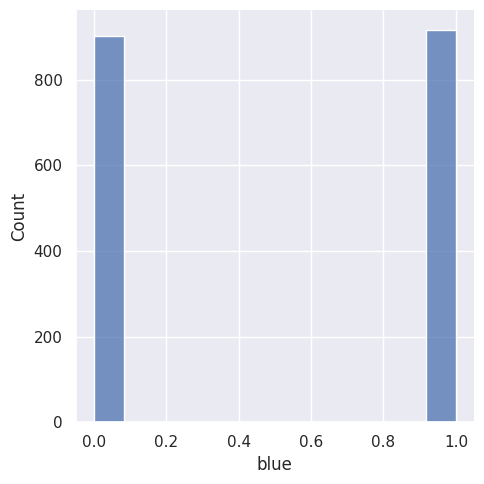

In [15]:
#Now see that how many devices have bluetooth and how many not
sns.set(rc={'figure.figsize':(6,6)})
ax=sns.displot(data=df_new["blue"])
plt.show()

Above displot shows that half of the devices has bluetooth and half of the devices has not the bluetooth.

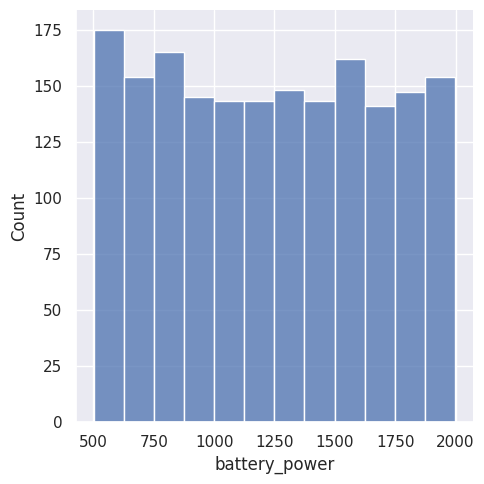

In [16]:
#Now let us see that how the battery mah is spread in all over the mobile categories
sns.set(rc={'figure.figsize':(6,6)})
ax=sns.displot(data=df_new["battery_power"])
plt.show()

Battery is an important feature of mobile phone,so above displot shows that more than 150 mobile phones has 2000 mah battery.

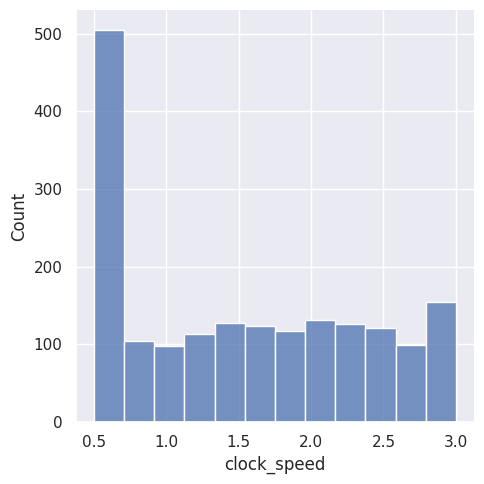

In [17]:
#Now see the clock speed of the mobile phones
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df_new["clock_speed"])
plt.show()

Above displot shows that maximum number of mobile phones have 0.5 ghz of clock speed.

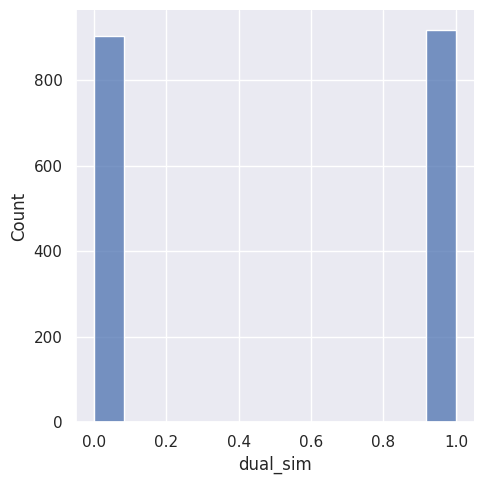

In [18]:
#Now let us check that how many mobile phones have dual sim and how many not
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df_new["dual_sim"])
plt.show()

Above displot shows that dual sim mobile phones have almost equally distributed.

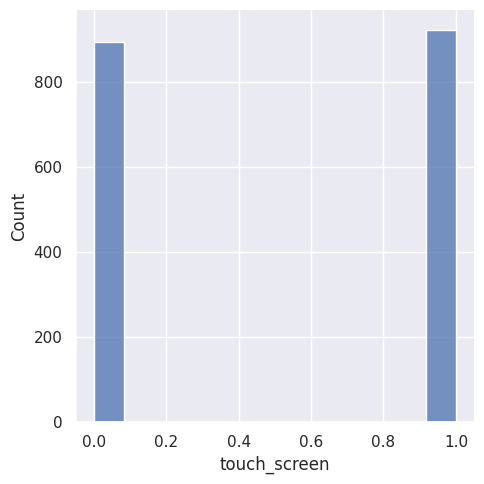

In [19]:
#Let us check that how many mobile phones have touch screen and how many are not
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df_new["touch_screen"])
plt.show()

Above displot shows that most of the mobile phones have touch screen but without touch screen mobile phones is almost same to the touch screen mobile phones.

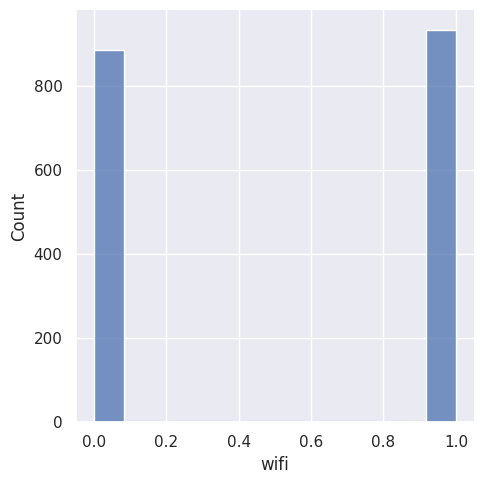

In [20]:
#check how many mobile phones have wifi or not
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df_new["wifi"])
plt.show()

From above bar graph we find that half of the mobile phones have not wifi and and half is wifi.

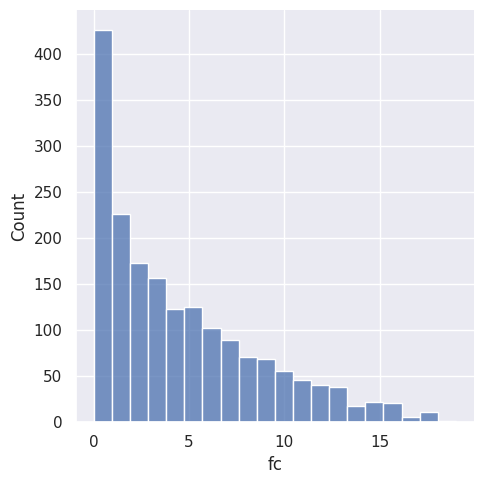

In [21]:
#Now let us check that how many mobile phones have front camera and how much megapixel is the camera
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df_new["fc"])
plt.show()

Above plot shows that more than 400 mobile phones have 0 megapixel camera,it means that these mobile phones have no front facing camera.

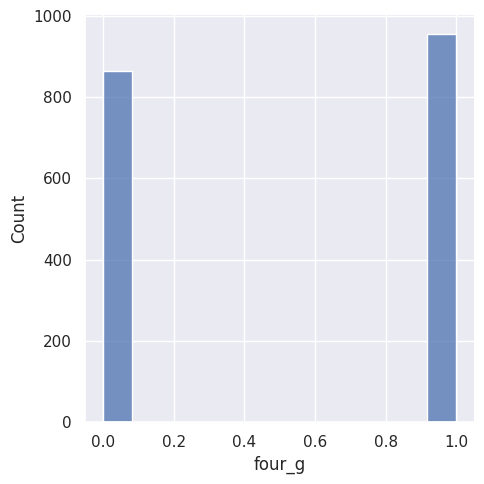

In [22]:
#Now let us find that how many mobile phones have 4g network or not
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df_new["four_g"])
plt.show()

From above graph we found that around 1000 mobile phones have 4g and around 900 mobile phones have not 4g

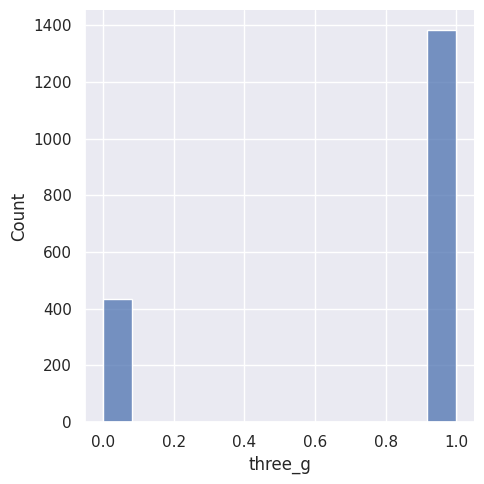

In [23]:
#Similarly check how many mobile phones have 3g network and how many not
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df_new["three_g"])
plt.show()

From this graph we shows that around 1400 mobile phones have 3g network and around 400 mobile phones not have 3g network

Let us do some bivariate and univariate analysis between input and output(Target) columns to know the relation between feature and target variables.

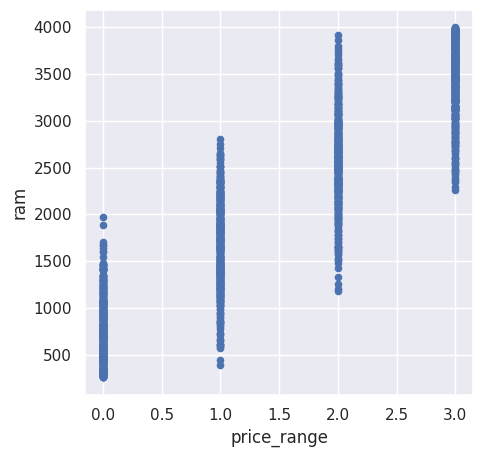

In [24]:
#Let us plot scatter plot between price range and ram
df_new.plot(x='price_range',y='ram',kind='scatter')
plt.show()

Above scatter plot shows that higher the ram higher the mobile price.

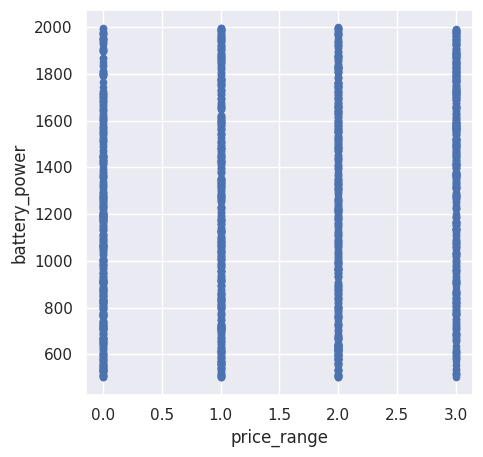

In [25]:
#Scatter plot between price_range and battery_power
df_new.plot(x='price_range',y='battery_power',kind='scatter')
plt.show()

Above scatter plot shows that there is no impact on mobile price of increasing the battery capacity.

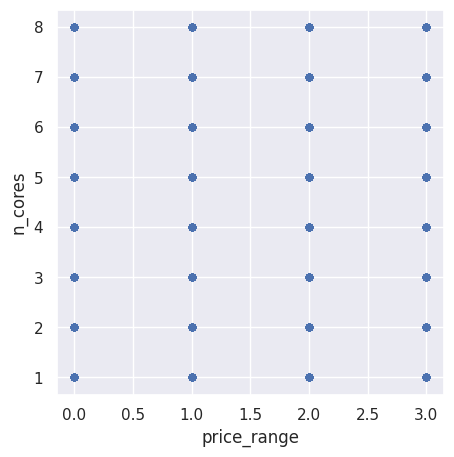

In [26]:
#Scatter plot price range Vs number of cores
df_new.plot(x='price_range',y='n_cores',kind='scatter')
plt.show()

As we see that no of cores vs price range is also equally distributed.

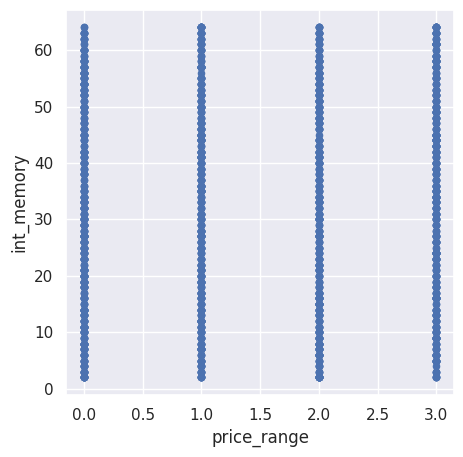

In [27]:
#scatter plot between price range and internal memory
df_new.plot(x='price_range',y='int_memory',kind='scatter')
plt.show()

Above scatter plot shows that internal memory not impact on mobile price,it is also almost equally in price range.

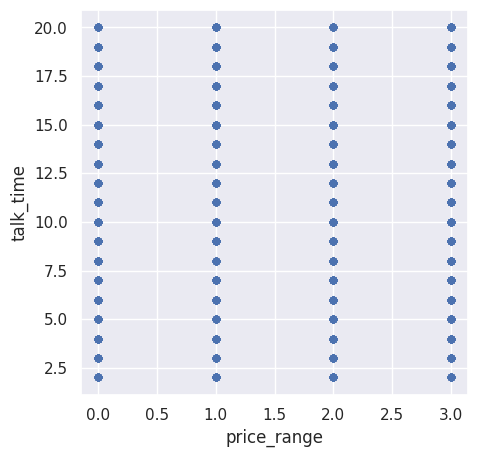

In [28]:
#scatter plot between price range vs talk time
df_new.plot(x='price_range',y='talk_time',kind='scatter')
plt.show()

Scatter plot of talktime Vs price range is equally same as battery capacity.

# **Now let us check the correlation of the data set**

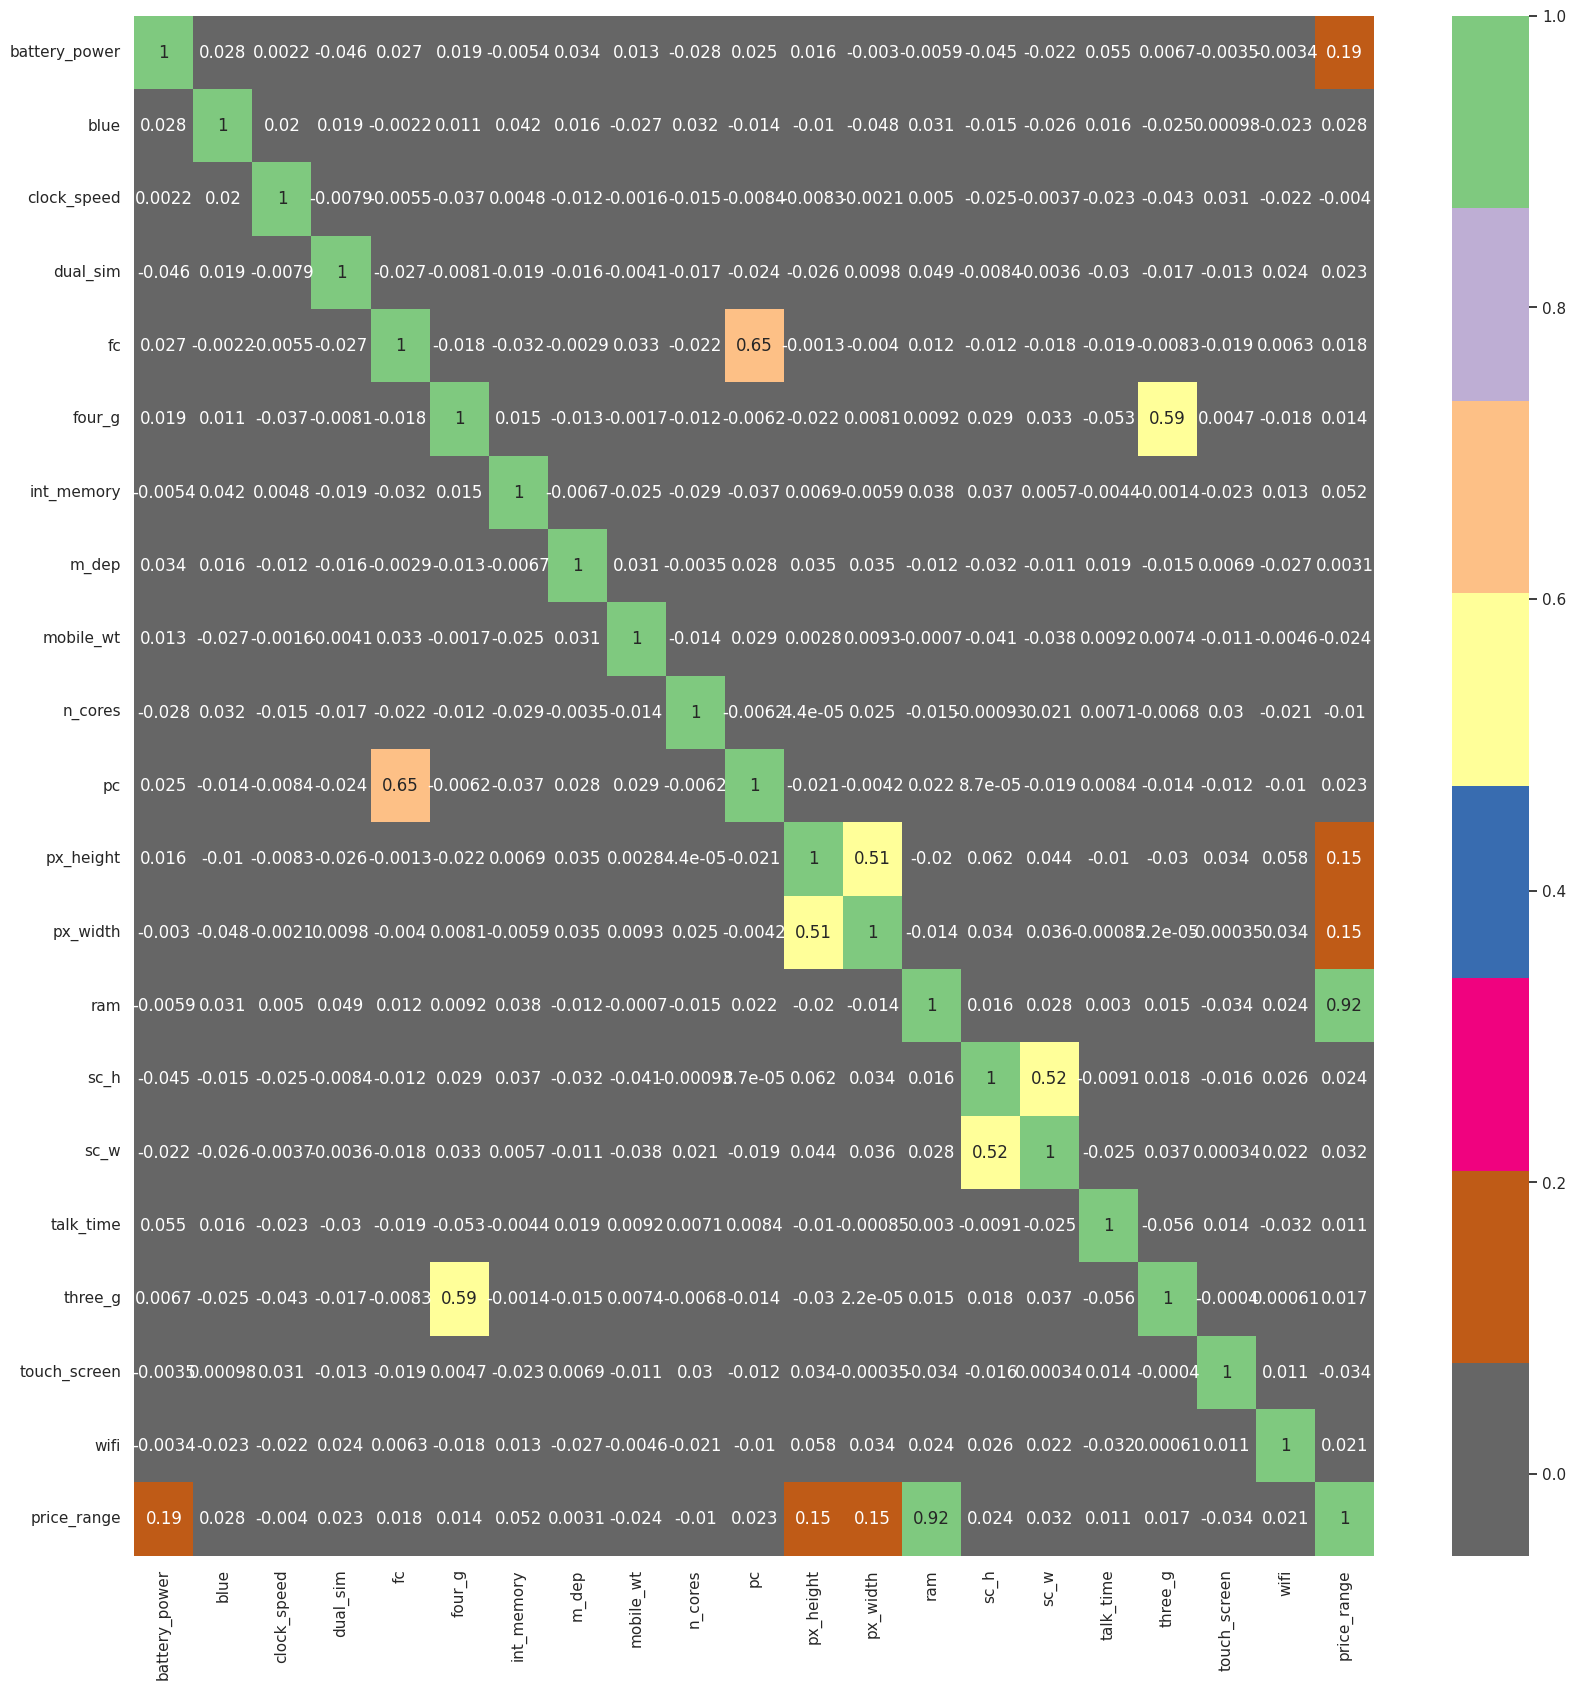

In [29]:
#Check correlation of the dataset
plt.figure(figsize=(20,20))
sns.heatmap(df_new.corr(),annot=True,cmap=plt.cm.Accent_r)
plt.show()

From above heatmap we shows that in this dataset every column is equally important for the  prediction of mobile price. So here no need to check the correlation of this dataset.

# **Check outliers**

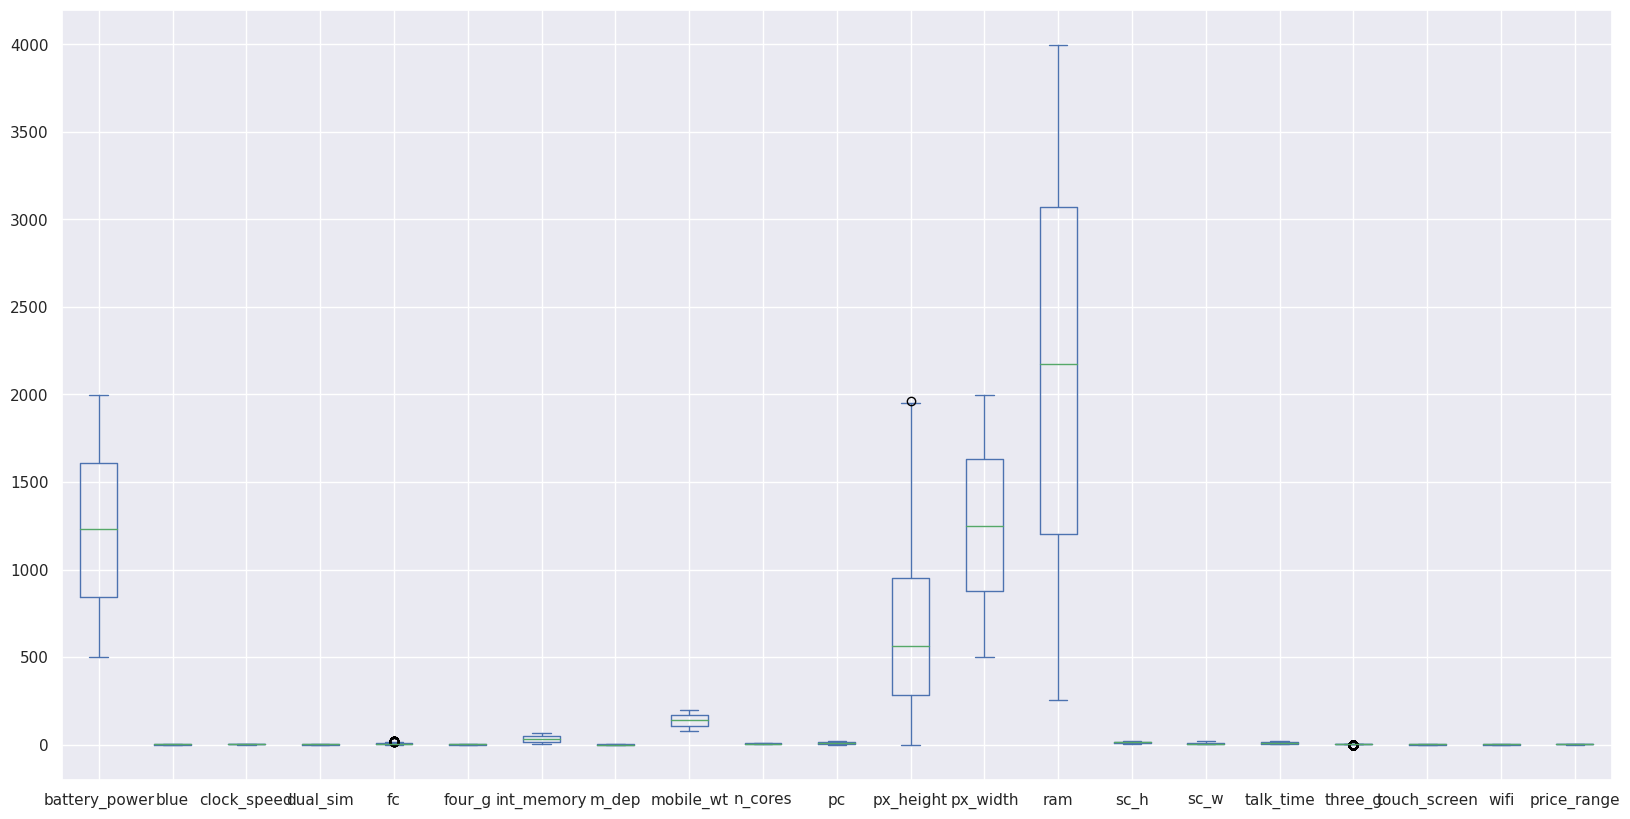

In [30]:
#Let us check whether there is any ouliers or not
df_new.plot(kind='box',figsize=(20,10))
plt.show()

Above boxplot shows that there is no outliers in this dataset.

In [31]:
#Now let us see if there are any missing values or missing data and also drop the target column and store in another variable
x=df_new.drop(['price_range'],axis=1)
y=df_new['price_range']
#Missing values
x.isna().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
dtype: bool

we did not find any missing values here.

# **Model Selection & Evaluation**

Before building a model we performed train_test_split.We kept 20% of the data for testing set and 75% of the data for training the model.

We compared 3 algorithms and evaluated them based on their accuracy score,to know which model is performing better and also make confusion matrix.A confusion matrix represents the prediction summary in matrix form.It shows how many prediction are correct and incorrect per class.It helps in understanding the classes that are being confused by model as other class.


# **Data Splitting**

In [32]:
#Now splitting our data into trainig and testing set to make our model
X_train, X_test, Y_train, Y_test =train_test_split(x,y,test_size=0.2,random_state=42)

# **Standardization**

In our data standardization is important because our data is not in scale,so to make our data in one scale standardization is necessary.If we will not do standardization,our model will not perform well.

In [33]:
#Let us do standardization to make our data in a scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# **Machine learning model implementation & Hyperparameter Tuning**

# ***Decision Tree Classifier***

It is a supervised machine learning algorithm

In [44]:
#Building a model using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5,random_state=42)
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [45]:
pred = dtc.predict(X_test)
pred

array([3, 0, 1, 0, 3, 0, 1, 2, 1, 3, 1, 0, 1, 1, 2, 1, 2, 2, 1, 2, 1, 0,
       0, 3, 1, 2, 1, 3, 2, 0, 0, 2, 1, 2, 3, 0, 3, 1, 0, 1, 2, 0, 0, 0,
       2, 1, 1, 0, 2, 2, 2, 3, 0, 3, 1, 0, 1, 3, 0, 2, 1, 0, 2, 0, 3, 1,
       1, 1, 3, 1, 3, 2, 3, 0, 0, 2, 2, 0, 3, 0, 2, 1, 3, 3, 3, 0, 1, 3,
       1, 3, 3, 2, 3, 0, 1, 0, 0, 3, 0, 0, 2, 1, 2, 0, 0, 3, 2, 0, 2, 0,
       2, 0, 0, 0, 3, 2, 2, 0, 1, 2, 1, 1, 2, 0, 0, 2, 2, 2, 3, 2, 2, 3,
       0, 3, 0, 1, 2, 0, 3, 3, 2, 2, 3, 0, 2, 2, 0, 3, 3, 1, 2, 1, 3, 1,
       2, 3, 0, 2, 1, 2, 1, 3, 1, 1, 2, 0, 1, 2, 2, 1, 3, 2, 2, 3, 1, 0,
       0, 3, 2, 2, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2,
       3, 0, 1, 3, 2, 2, 0, 2, 1, 3, 3, 3, 2, 2, 0, 3, 0, 0, 2, 1, 3, 2,
       1, 1, 2, 0, 3, 1, 2, 1, 3, 1, 1, 2, 3, 1, 3, 2, 1, 0, 0, 3, 1, 3,
       0, 1, 1, 1, 2, 2, 3, 3, 0, 1, 0, 0, 3, 2, 1, 3, 2, 1, 3, 3, 1, 2,
       1, 0, 2, 0, 1, 2, 3, 3, 2, 1, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 0, 0, 2, 1, 2, 3, 1, 3, 2, 3, 3, 2,

**Accuracy Score & Confusion Matrix**

In [46]:
#Now check accuracy score to check accuracy of the model and confusion matrix to know the performance of the model
from sklearn.metrics import accuracy_score, confusion_matrix
dtc_acc = accuracy_score(pred, Y_test)
print(dtc_acc)
print(confusion_matrix(pred, Y_test))

0.8296703296703297
[[75  8  0  0]
 [ 9 84  9  0]
 [ 0 10 73 12]
 [ 0  0 14 70]]


So,we can see that Decision Tree Classifier gives us 82% accuracy,which is good in prediction.

# ***Support Vector Classifier***

It is also a Supervised Machine Learning Algorithm

In [37]:
#Building model using Support Vector Classifier
from sklearn.svm import SVC
sv_c = SVC()
sv_c.fit(X_train, Y_train)

SVC()

In [38]:
pred1 = sv_c.predict(X_test)
pred1

array([3, 0, 1, 0, 3, 0, 1, 2, 1, 3, 1, 0, 0, 1, 2, 1, 3, 3, 0, 3, 1, 0,
       0, 3, 1, 3, 1, 3, 2, 0, 0, 2, 0, 2, 3, 0, 3, 2, 0, 1, 2, 1, 1, 0,
       2, 2, 0, 0, 2, 3, 3, 3, 0, 2, 1, 0, 0, 2, 0, 2, 1, 0, 2, 0, 3, 1,
       1, 1, 2, 1, 3, 2, 3, 0, 0, 2, 3, 0, 3, 0, 2, 1, 2, 3, 3, 1, 2, 3,
       1, 2, 2, 2, 3, 0, 1, 0, 0, 3, 0, 0, 1, 1, 2, 1, 1, 3, 2, 1, 2, 0,
       1, 0, 1, 0, 3, 2, 2, 0, 1, 2, 1, 1, 1, 0, 0, 2, 2, 3, 3, 2, 2, 3,
       0, 3, 0, 1, 1, 0, 3, 2, 2, 2, 3, 0, 2, 3, 1, 3, 3, 1, 2, 1, 3, 1,
       2, 3, 0, 2, 1, 1, 1, 3, 2, 2, 2, 0, 1, 2, 3, 1, 3, 2, 2, 3, 1, 0,
       0, 3, 1, 2, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2,
       3, 0, 1, 2, 1, 2, 0, 2, 1, 2, 3, 3, 2, 2, 0, 3, 0, 0, 3, 1, 3, 1,
       2, 2, 1, 0, 3, 1, 2, 0, 3, 1, 0, 2, 3, 1, 3, 2, 1, 0, 0, 2, 0, 3,
       0, 1, 1, 1, 2, 2, 3, 3, 0, 1, 0, 0, 2, 2, 1, 3, 2, 2, 2, 3, 2, 2,
       1, 0, 2, 0, 1, 2, 3, 3, 2, 1, 1, 2, 0, 3, 2, 0, 1, 1, 1, 1, 2, 2,
       1, 1, 2, 0, 0, 3, 1, 2, 3, 1, 3, 3, 2, 3, 2,

**Accuracy Score & Confusion Matrix**

In [39]:
#Now check accuracy score to check the accuracy of the model and confusion matrix to check the performance of the model
from sklearn.metrics import accuracy_score, confusion_matrix
svc_acc = accuracy_score(pred1,Y_test)
print(svc_acc)
print(confusion_matrix(pred1,Y_test))

0.8763736263736264
[[78  5  0  0]
 [ 6 84  9  0]
 [ 0 13 81  6]
 [ 0  0  6 76]]


From above model(Support Vector Classifier) we get 87% of the accuracy,it means our model is performing well.And SVC is performing better than Decision Tree Classifier.

# ***Logistic Regression***

It is also used to find the classification problem.

In [40]:
#Building a model using Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [41]:
pred2 = lr.predict(X_test)
pred2

array([3, 0, 1, 0, 2, 0, 1, 2, 1, 3, 1, 0, 0, 1, 2, 1, 2, 2, 0, 2, 1, 0,
       0, 3, 1, 3, 1, 3, 2, 0, 0, 2, 0, 3, 3, 0, 3, 2, 0, 1, 2, 0, 1, 0,
       2, 1, 0, 0, 2, 3, 3, 3, 0, 3, 2, 0, 0, 2, 0, 2, 1, 0, 2, 0, 3, 1,
       1, 1, 3, 1, 3, 2, 3, 0, 0, 2, 3, 0, 3, 0, 2, 1, 2, 3, 3, 1, 2, 3,
       1, 2, 2, 1, 2, 0, 1, 0, 0, 3, 0, 0, 2, 1, 2, 0, 1, 3, 2, 0, 2, 0,
       1, 0, 1, 0, 3, 2, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 3, 3, 2, 2, 3,
       0, 3, 0, 1, 1, 0, 3, 3, 2, 2, 3, 0, 2, 2, 1, 3, 3, 1, 2, 1, 3, 1,
       3, 3, 0, 2, 1, 1, 1, 3, 1, 2, 2, 0, 1, 2, 3, 1, 3, 2, 2, 3, 0, 0,
       0, 3, 1, 2, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2,
       3, 0, 1, 3, 2, 2, 0, 2, 1, 2, 3, 3, 2, 2, 0, 3, 0, 0, 3, 1, 3, 1,
       1, 1, 2, 0, 3, 1, 1, 1, 3, 1, 0, 2, 3, 1, 3, 2, 1, 0, 0, 2, 0, 3,
       0, 1, 1, 1, 2, 2, 3, 3, 0, 1, 0, 0, 2, 2, 1, 3, 2, 1, 2, 3, 2, 2,
       1, 0, 2, 0, 1, 2, 3, 3, 2, 1, 1, 2, 0, 3, 2, 0, 1, 1, 1, 1, 2, 1,
       0, 2, 2, 0, 0, 3, 1, 2, 3, 1, 3, 3, 2, 3, 2,

**Accuracy Score & Confusion Matrix**

In [42]:
#Now check accuracy score to check the accuracy of the model and confusion matrix to check the performance of the model
from sklearn.metrics import accuracy_score, confusion_matrix
lr_acc = accuracy_score(pred2,Y_test)
print(lr_acc)
print(confusion_matrix(pred2,Y_test))

0.9615384615384616
[[83  3  0  0]
 [ 1 96  2  0]
 [ 0  3 91  2]
 [ 0  0  3 80]]


Here we can see that Logistic Regression is better performing both Decision Tree Classifier and SVC.And gives us 96% of the accuracy,which is good for prediction.

Now let us compare all three models using bar plot that which is performing better.

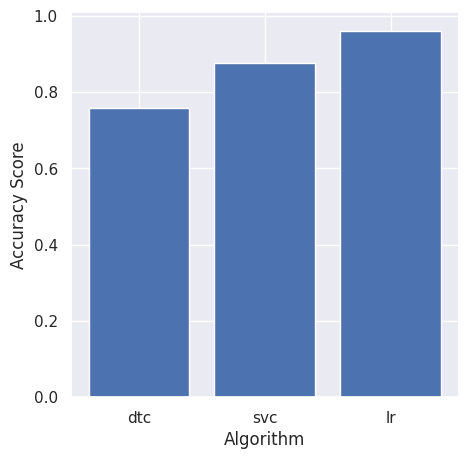

In [43]:
#Make bar plot among all three models to know that which model is performing better
plt.bar(x=['dtc','svc','lr'],height=[dtc_acc,svc_acc,lr_acc])
plt.xlabel("Algorithm")
plt.ylabel("Accuracy Score")
plt.show()

From above bar graph we see that Linear Regression is performing better other than Decision Tree Classfier and Support Vector Classifier.

# **Conclusion**

:-In this classification problem (Mobile Price Range Prediction) statement we saw that it has 2000 rows and 21 columns.

:-We started with data understanding,data wrangling,basic EDA and we found some trends between price range and independent variables.And we found that every column in our dataset is equally important for building a model.

:-We also do standardization to make our data in one scale.It is a technique to re scale features value with the distribution value between 0 and 1.

:-Implemented various classification algorithms like Decision Tree,SVM classifier and Logistic regression,we found that logistic regression gives us the best result.Which gives us 96% of the accuracy,than SVM classifier 87% and than Decision Tree Classifier that is 81%.
